In [54]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [55]:
data = pd.read_csv("worker_churn.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [56]:
data['Attrition'] = (data['Attrition'] == 'Yes').astype(int)
print(data.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [57]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data.head()
y = data['Attrition']
X = data.drop('Attrition', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   int64 
 2   DailyRate                          1470 non-null   int64 
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EmployeeCount                      1470 non-null   int64 
 6   EmployeeNumber                     1470 non-null   int64 
 7   EnvironmentSatisfaction            1470 non-null   int64 
 8   HourlyRate                         1470 non-null   int64 
 9   JobInvolvement                     1470 non-null   int64 
 10  JobLevel                           1470 non-null   int64 
 11  JobSatisfaction                    1470 non-null   int64 
 12  Monthl

In [58]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

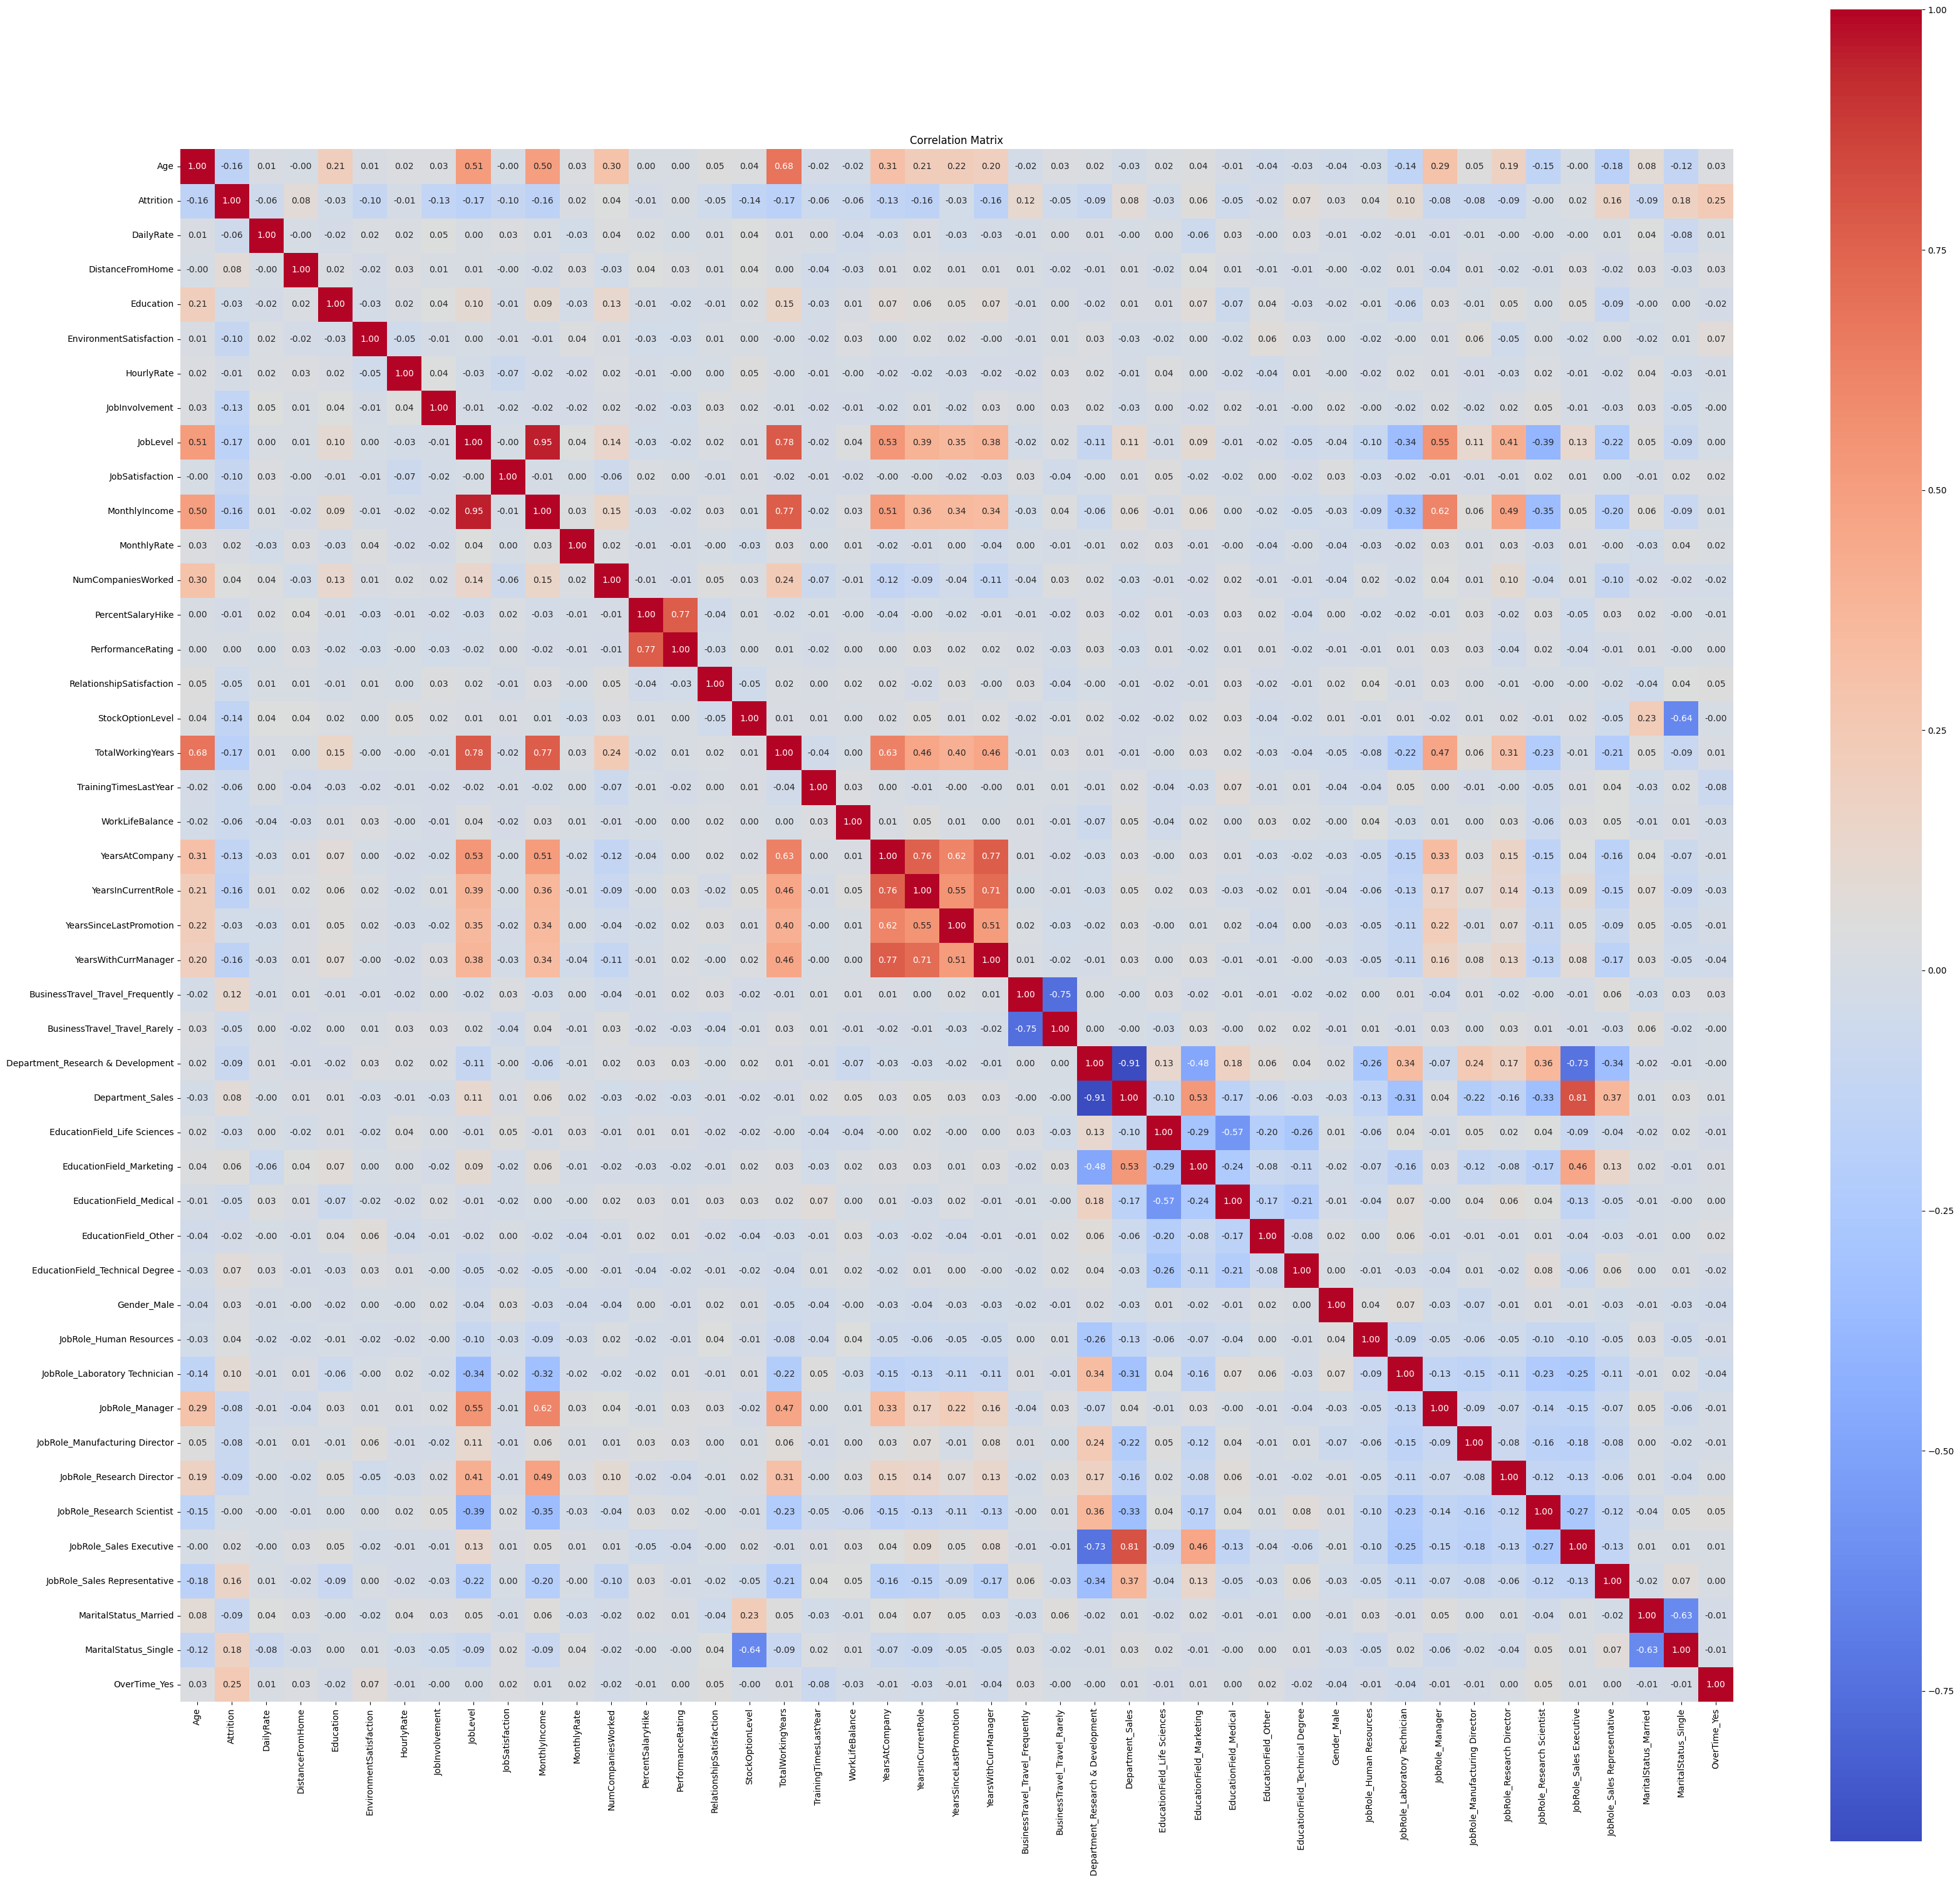

In [59]:
plt.figure(figsize=(40,38))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix") 
plt.show()

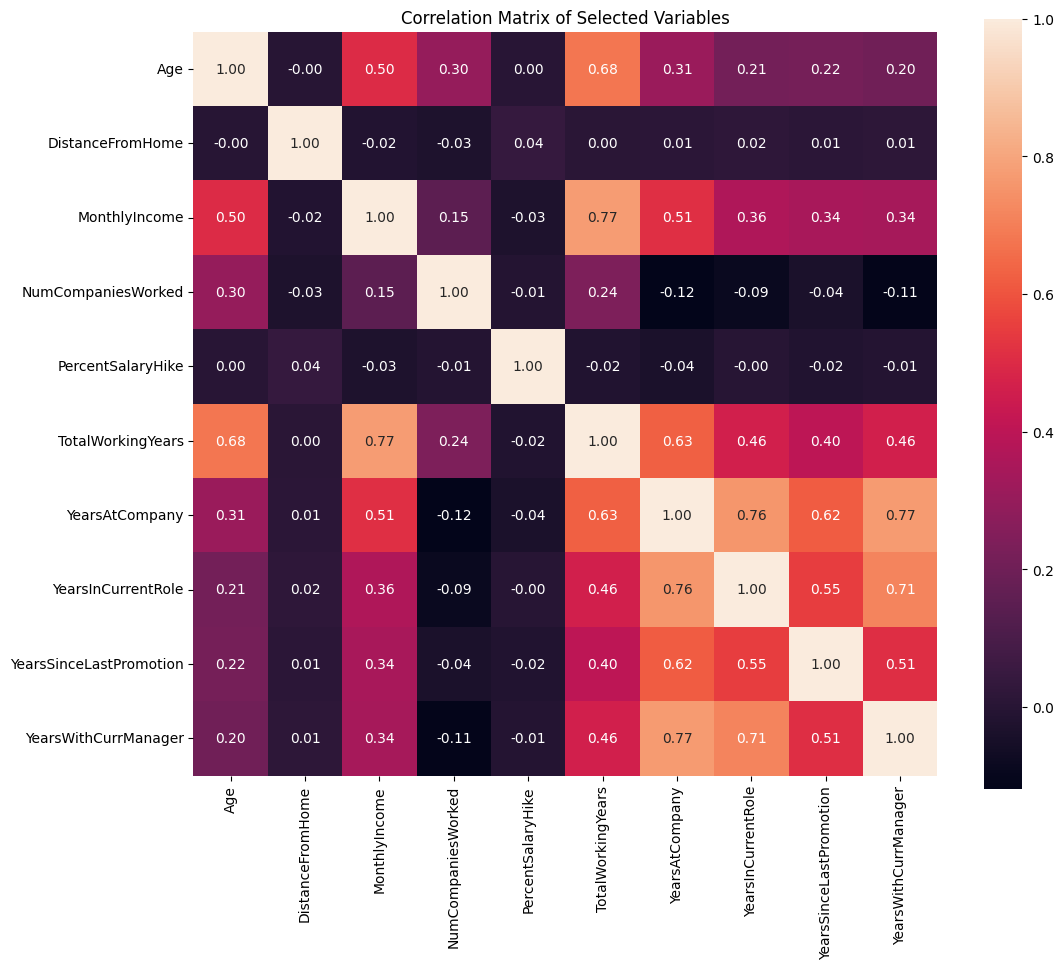

In [60]:
vars_to_plot = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
corr = data[vars_to_plot].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Variables")
plt.show()

Need to choose specific variables to look at since there are so many available. I plan to separate my data into 4 predictor sets. One being time/experience variables, second being compensation/reward variables, third being life/surrounding environment variables, and finally field/role/education variables.

In [61]:
time_exp_data = ["Age", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears", "NumCompaniesWorked", "TrainingTimesLastYear"]
comp_reward_data = ["MonthlyIncome", "PercentSalaryHike", "HourlyRate", "DailyRate", "MonthlyRate", "StockOptionLevel", "OverTime_Yes"]
life_env_data = ["WorkLifeBalance", "MaritalStatus_Married", "MaritalStatus_Single", "Gender_Male", "DistanceFromHome", "EnvironmentSatisfaction", "JobSatisfaction", 
                     "RelationshipSatisfaction", "JobInvolvement", "PerformanceRating"]
job_role_data = ["JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", 
                      "JobRole_Sales Executive", "JobRole_Sales Representative", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Education", "EducationField_Life Sciences", 
                      "EducationField_Marketing", "EducationField_Medical", "EducationField_Other", "EducationField_Technical Degree", "Department_Research & Development", "Department_Sales", "JobLevel"]

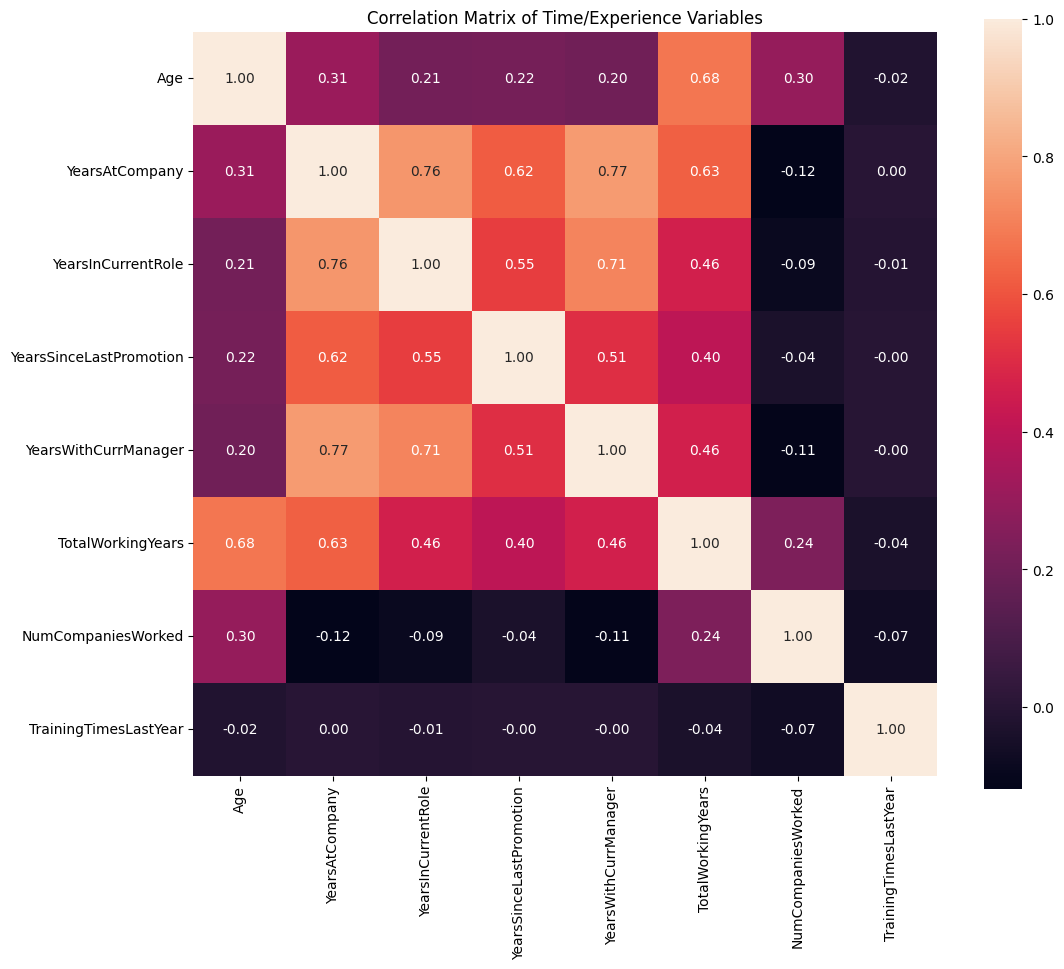

In [62]:
corr = data[time_exp_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Time/Experience Variables")
plt.show()

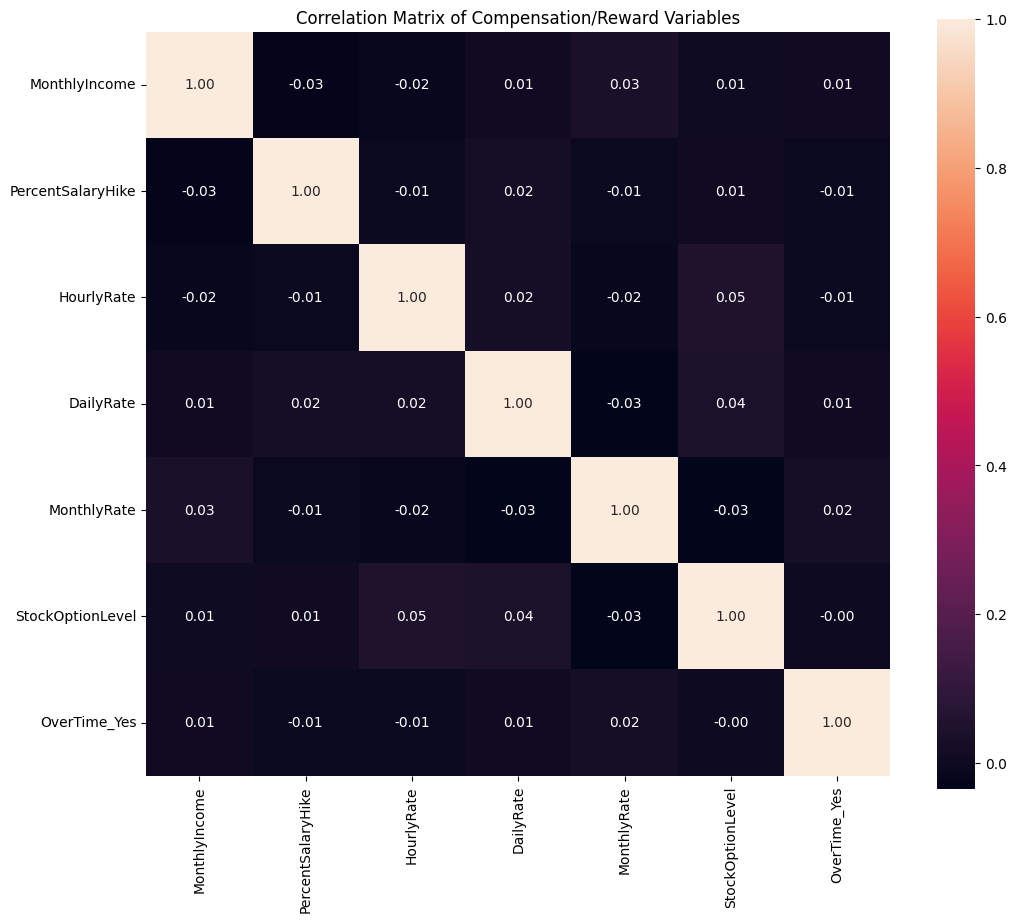

In [63]:
corr = data[comp_reward_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Compensation/Reward Variables")
plt.show()

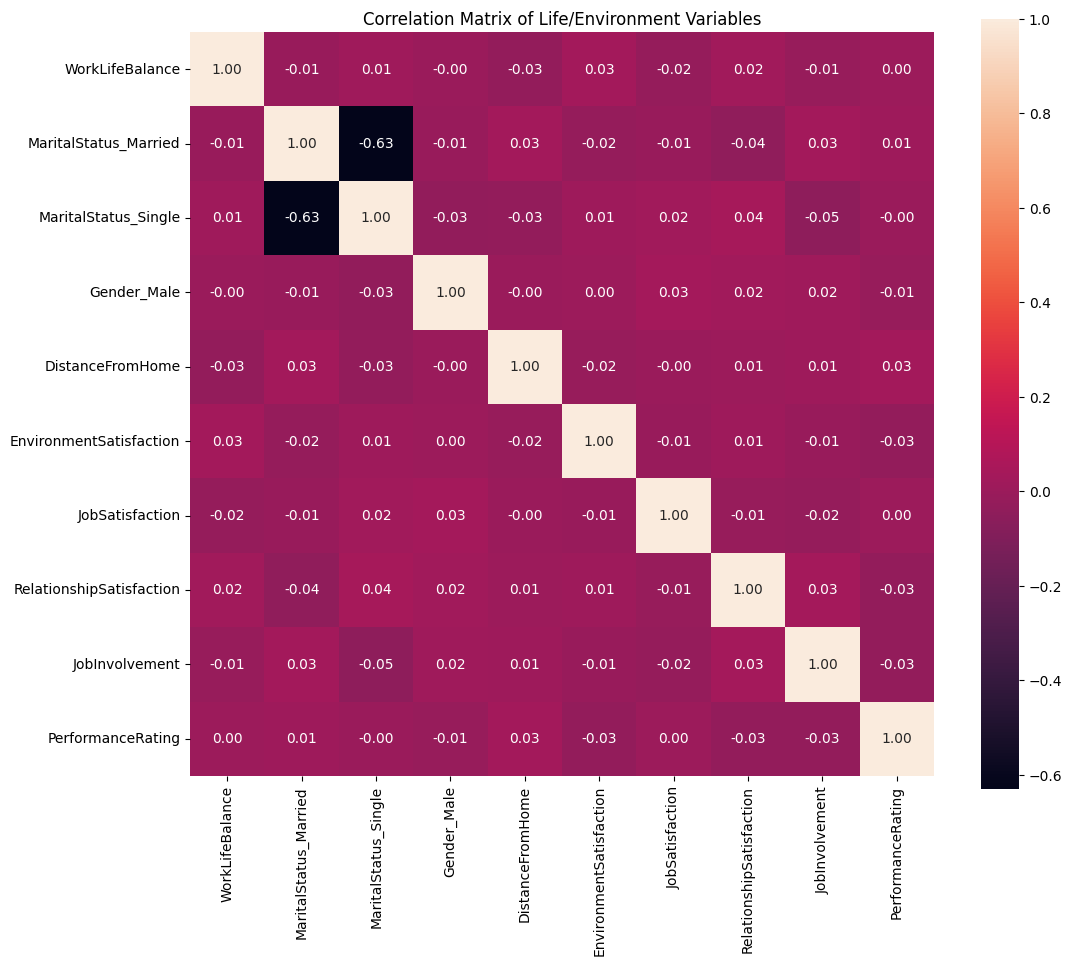

In [64]:
corr = data[life_env_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Life/Environment Variables")
plt.show()

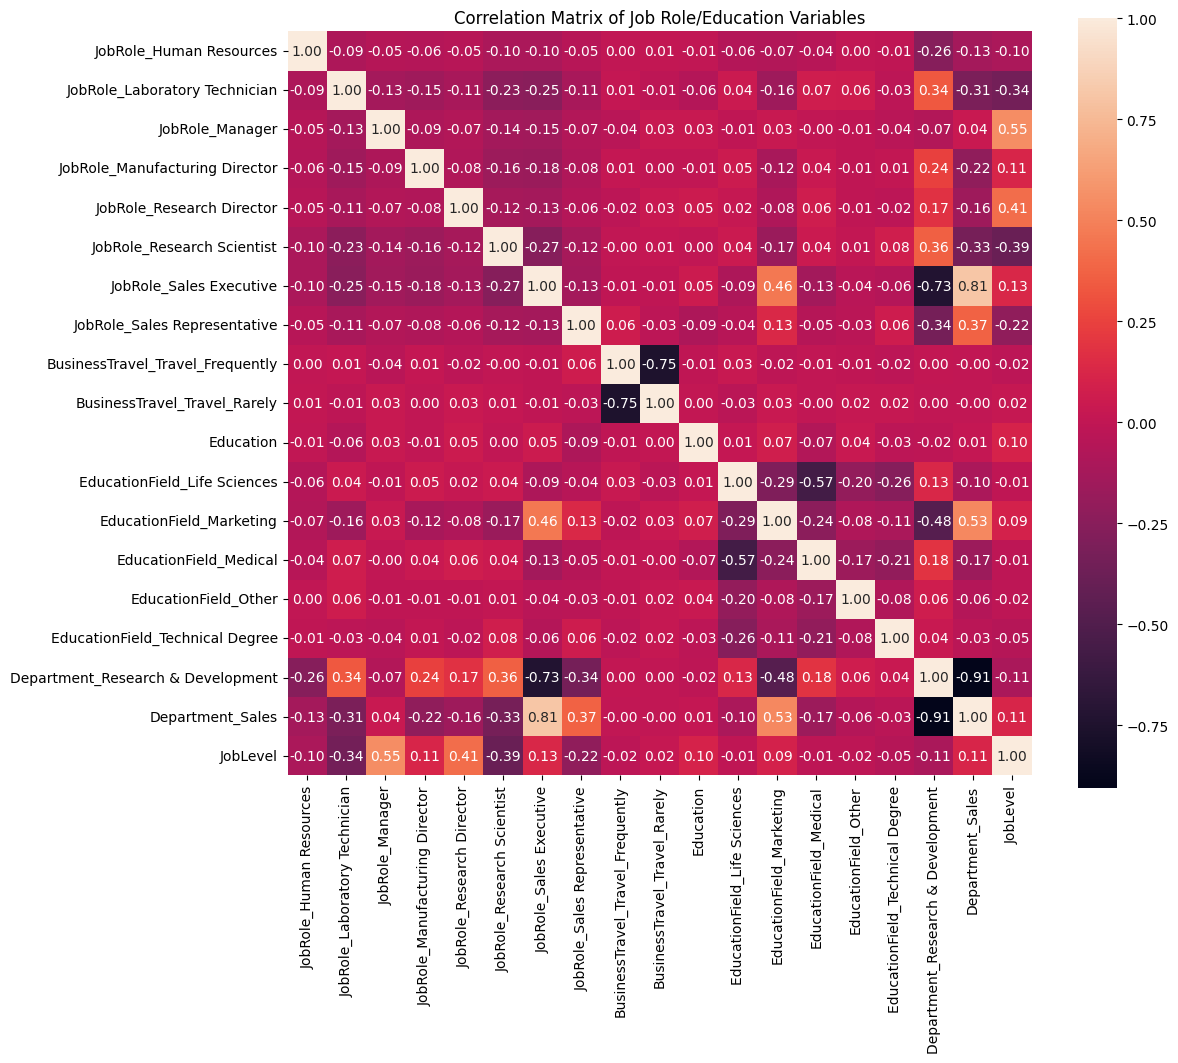

In [65]:
corr = data[job_role_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Job Role/Education Variables")
plt.show()

In [66]:
te_train, te_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition'])
time_exp_data = ["Age", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears", "NumCompaniesWorked", "TrainingTimesLastYear"]
X_train = te_train[time_exp_data]
y_train = te_train['Attrition']
X_test = te_test[time_exp_data]
y_test = te_test['Attrition']

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [67]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8412698412698413
Precision: 1.0
Recall: 0.014084507042253521
ROC-AUC: 0.5070422535211268

Confusion Matrix:
[[370   0]
 [ 70   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [68]:
comp_train, comp_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition'])
comp_reward_data = ["MonthlyIncome", "PercentSalaryHike", "HourlyRate", "DailyRate", "MonthlyRate", "StockOptionLevel", "OverTime_Yes"]
C_train = comp_train[comp_reward_data]
yc_train = comp_train['Attrition']
C_test = comp_test[comp_reward_data]
yc_test = comp_test['Attrition']

scaler = StandardScaler().fit(C_train)

C_train_scaled = scaler.transform(C_train)
C_test_scaled = scaler.transform(C_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(C_train_scaled, yc_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [69]:
yc_pred = log_reg.predict(C_test_scaled)
yc_prob = log_reg.predict(C_test_scaled)

print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred))
print("Recall:", recall_score(yc_test, yc_pred))
print("ROC-AUC:", roc_auc_score(yc_test, yc_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(yc_test, yc_pred))

print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

Accuracy: 0.8435374149659864
Precision: 0.6
Recall: 0.08450704225352113
ROC-AUC: 0.536848115721355

Confusion Matrix:
[[366   4]
 [ 65   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       370
           1       0.60      0.08      0.15        71

    accuracy                           0.84       441
   macro avg       0.72      0.54      0.53       441
weighted avg       0.81      0.84      0.79       441



In [70]:
life_train, life_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition'])
life_env_data = ["WorkLifeBalance", "MaritalStatus_Married", "MaritalStatus_Single", "Gender_Male", "DistanceFromHome", "EnvironmentSatisfaction", "JobSatisfaction", 
                     "RelationshipSatisfaction", "JobInvolvement", "PerformanceRating"]

L_train = life_train[life_env_data]
yl_train = life_train['Attrition']
L_test = life_test[life_env_data]
yl_test = life_test['Attrition']

scaler = StandardScaler().fit(L_train)

L_train_scaled = scaler.transform(L_train)
L_test_scaled = scaler.transform(L_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(L_train_scaled, yl_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [71]:
yl_pred = log_reg.predict(L_test_scaled)
yl_prob = log_reg.predict(L_test_scaled)

print("Accuracy:", accuracy_score(yl_test, yl_pred))
print("Precision:", precision_score(yl_test, yl_pred))
print("Recall:", recall_score(yl_test, yl_pred))
print("ROC-AUC:", roc_auc_score(yl_test, yl_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(yl_test, yl_pred))

print("\nClassification Report:")
print(classification_report(yl_test, yl_pred))

Accuracy: 0.8344671201814059
Precision: 0.3333333333333333
Recall: 0.028169014084507043
ROC-AUC: 0.508679101636848

Confusion Matrix:
[[366   4]
 [ 69   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       370
           1       0.33      0.03      0.05        71

    accuracy                           0.83       441
   macro avg       0.59      0.51      0.48       441
weighted avg       0.76      0.83      0.77       441



In [72]:
job_train, job_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition'])
job_role_data = ["JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", 
                      "JobRole_Sales Executive", "JobRole_Sales Representative", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Education", "EducationField_Life Sciences", 
                      "EducationField_Marketing", "EducationField_Medical", "EducationField_Other", "EducationField_Technical Degree", "Department_Research & Development", "Department_Sales", "JobLevel"]
J_train = job_train[job_role_data]
yj_train = job_train['Attrition']
J_test = job_test[job_role_data]
yj_test = job_test['Attrition']

scaler = StandardScaler().fit(J_train)

J_train_scaled = scaler.transform(J_train)
J_test_scaled = scaler.transform(J_test)
clfCV = LogisticRegressionCV(cv = 5, multi_class = "multinomial", random_state = 111, solver = 'saga',penalty = 'l1',tol = 0.1, max_iter = 1000,n_jobs=-1)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(J_train_scaled, yj_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [73]:
yj_pred = log_reg.predict(J_test_scaled)
yj_prob = log_reg.predict(J_test_scaled)

print("Accuracy:", accuracy_score(yj_test, yj_pred))
print("Precision:", precision_score(yj_test, yj_pred))
print("Recall:", recall_score(yj_test, yj_pred))
print("ROC-AUC:", roc_auc_score(yj_test, yj_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(yj_test, yj_pred))

print("\nClassification Report:")
print(classification_report(yj_test, yj_pred))

Accuracy: 0.8344671201814059
Precision: 0.3333333333333333
Recall: 0.028169014084507043
ROC-AUC: 0.508679101636848

Confusion Matrix:
[[366   4]
 [ 69   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       370
           1       0.33      0.03      0.05        71

    accuracy                           0.83       441
   macro avg       0.59      0.51      0.48       441
weighted avg       0.76      0.83      0.77       441



In [ ]:
print(data.columns)


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

In [75]:
full_train, full_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition'])
X_train_full = full_train.drop('Attrition', axis=1)
y_train_full = full_train['Attrition']

X_test_full = full_test.drop('Attrition', axis=1)
y_test_full = full_test['Attrition']

scaler = StandardScaler().fit(X_train_full)

X_train_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)
#multi_class = "multinomial",
clfCV = LogisticRegressionCV(cv = 5,  random_state = 111, solver = 'saga',penalty = 'l2',tol = 0.1, max_iter = 1000,n_jobs=-1)
clfCV.fit(X_train_scaled,y_train_full)
score = clfCV.score(X_test_scaled,y_test_full)
print(score)

log_reg_full = LogisticRegression(max_iter=500)
log_reg_full.fit(X_train_scaled, y_train_full)

0.8888888888888888


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [76]:
y_pred_full = clfCV.predict(X_test_scaled)
y_prob_full = clfCV.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print("Precision:", precision_score(y_test_full, y_pred_full))
print("Recall:", recall_score(y_test_full, y_pred_full))
print("ROC-AUC:", roc_auc_score(y_test_full, y_prob_full))


print(clfCV.coef_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full))
#add regularization?
#penalty = l1
print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_full))

Accuracy: 0.8888888888888888
Precision: 0.7619047619047619
Recall: 0.4507042253521127
ROC-AUC: 0.7118385991625429
[[-0.44066584 -0.10543631  0.31686238  0.03208481 -0.42335049 -0.06965403
  -0.35062856  0.06724542 -0.42700923 -0.07977009  0.04929948  0.46477766
  -0.08357434  0.07054902 -0.3221033  -0.30965247 -0.25756132 -0.26763927
  -0.25773557 -0.1292282  -0.36004883  0.61888666 -0.28783675  0.58350753
   0.24303132 -0.07622716  0.07827473 -0.09660121  0.02052485 -0.16312995
  -0.19791602  0.06422289  0.13507167  0.16665422  0.51930726  0.07946969
  -0.07929575 -0.26459962 -0.05278918  0.18347419  0.30062911 -0.00090397
   0.31916422  0.82152303]]

Confusion Matrix:
[[360  10]
 [ 39  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       370
           1       0.76      0.45      0.57        71

    accuracy                           0.89       441
   macro avg       0.83      0.71      0.75       441
we

In [ ]:
y_pred_full = log_reg_full.predict(X_test_scaled)
y_prob_full = log_reg_full.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print("Precision:", precision_score(y_test_full, y_pred_full))
print("Recall:", recall_score(y_test_full, y_pred_full))
print("ROC-AUC:", roc_auc_score(y_test_full, y_prob_full))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full))
#add regularization?
#penalty = l1
print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_full))
#earlier version

Accuracy: 0.8798185941043084
Precision: 0.725
Recall: 0.4084507042253521
ROC-AUC: 0.6893604872478112

Confusion Matrix:
[[359  11]
 [ 42  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.72      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.87      0.88      0.87       441



In [78]:
param_grid = {'n_estimators': [100, 200, 300, 400], 'max_depth': [5, 10, 15]}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train_full)

print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best CV score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

Best n_estimators: 300
Best max_depth: 10
Best CV score: 0.8639450627515984


In [79]:
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test_full, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test_full, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test_full, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test_full, y_prob_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_full, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_rf))


Random Forest Accuracy: 0.8276643990929705
Random Forest Precision: 0.391304347826087
Random Forest Recall: 0.1267605633802817
Random Forest ROC-AUC: 0.5444613627712218

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       370
           1       0.39      0.13      0.19        71

    accuracy                           0.83       441
   macro avg       0.62      0.54      0.55       441
weighted avg       0.78      0.83      0.79       441


Random Forest Confusion Matrix:
[[356  14]
 [ 62   9]]


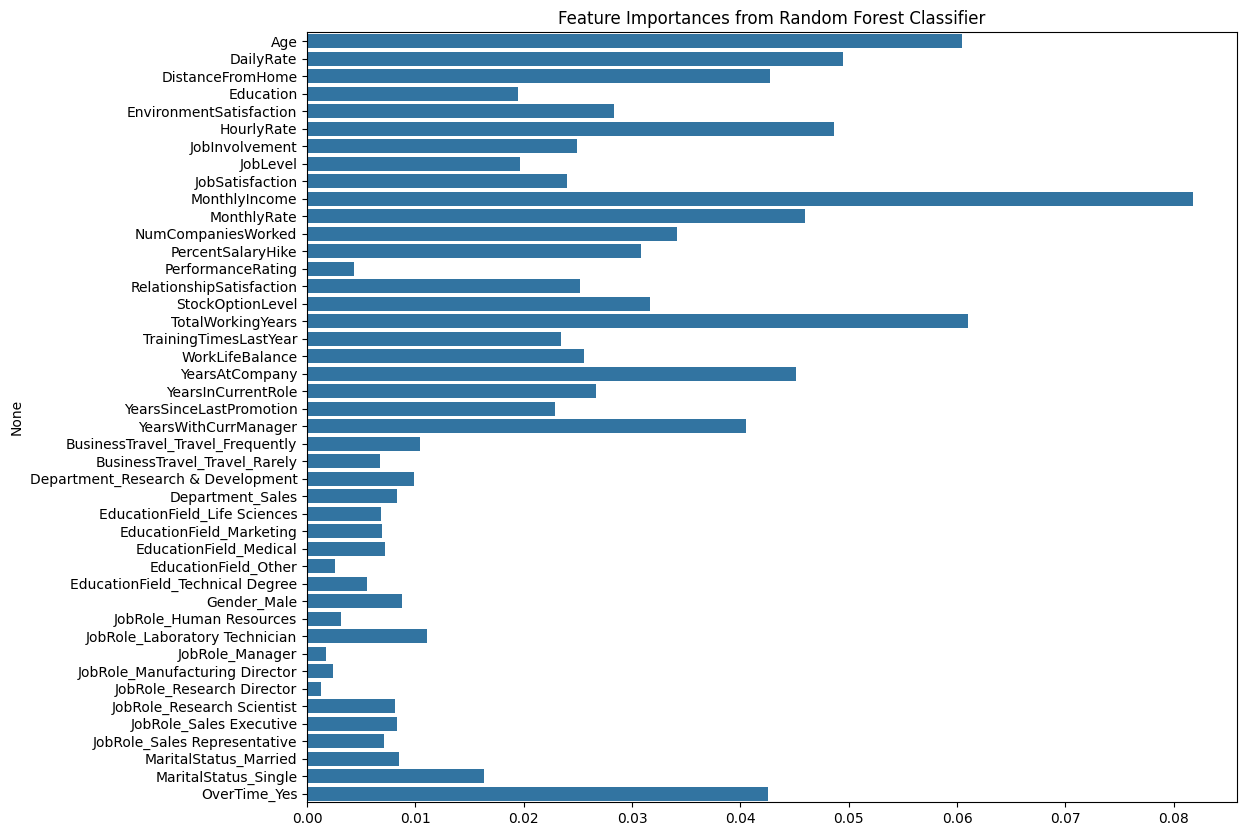

In [80]:
plt.figure(figsize=(12,10))
sns.barplot(x=best_rf.feature_importances_, y=X_train_full.columns)
plt.title("Feature Importances from Random Forest Classifier")
plt.show()

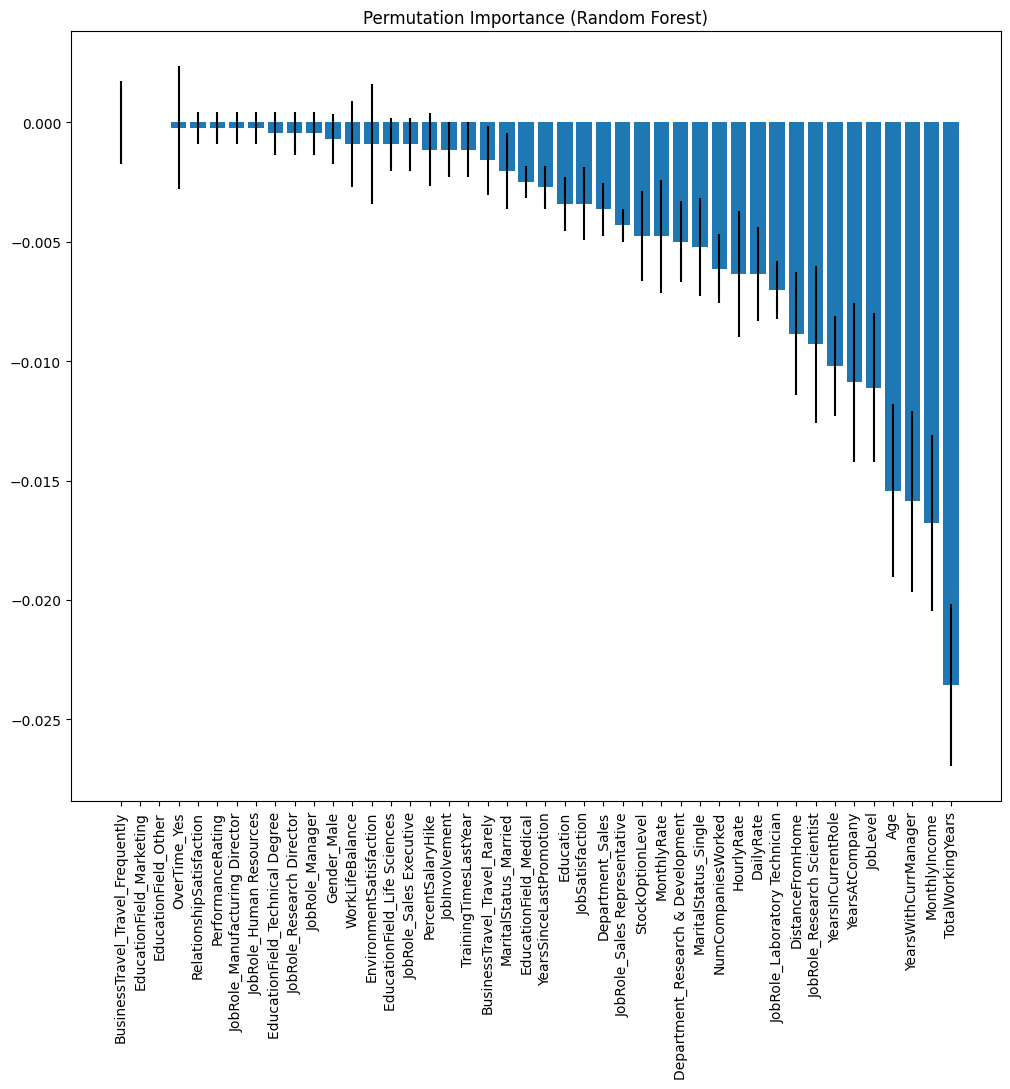

In [81]:
result = permutation_importance(best_rf, X_test_scaled, y_test_full, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,10))
plt.title("Permutation Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align='center')
plt.xticks(range(len(importances)), X_train_full.columns[indices], rotation=90)
plt.show()

In [87]:
results = {"Model": [
        "Set 1: Time/Experience",
        "Set 2: Compensation/Reward",
        "Set 3: Life/Environment",
        "Set 4: Job Role/Education",
        "Full Logistic Regression",
        "Random Forest"
    ],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred),2),     # Set 1
        round(accuracy_score(yc_test, yc_pred),2),     # Set 2
        round(accuracy_score(yl_test, yl_pred),2),     # Set 3
        round(accuracy_score(yj_test, yj_pred),2),     # Set 4
        0,    # Full LR
        0.8398     # RF
    ],
    "Precision": [
        round(precision_score(y_test, y_pred),2),   # Set 1
        round(precision_score(yc_test, yc_pred),2),   # Set 2
        round(precision_score(yl_test, yl_pred),2),  # Set 3
        round(precision_score(yj_test, yj_pred),2),  # Set 4
        0,  # Full LR
        0.50    # RF
    ],
    "Recall": [
        round(recall_score(y_test, y_pred),2),  # Set 1
        round(recall_score(yc_test, yc_pred),2),  # Set 2
        round(recall_score(yl_test, yl_pred),2),  # Set 3
        round(recall_score(yj_test, yj_pred),2),  # Set 4
        0,  # Full LR
        0.155   # RF
    ],
    "ROC-AUC": [
        round(roc_auc_score(y_test, y_prob),2),  # Set 1
        round(roc_auc_score(yc_test, yc_prob),2),  # Set 2
        round(roc_auc_score(yl_test, yl_prob),2),  # Set 3
        round(roc_auc_score(yj_test, yj_prob),2),  # Set 4
        0,  # Full LR
        0.565,   # RF
    ]
}

comparison_df = pd.DataFrame(results)
comparison_df

,Model,Accuracy,Precision,Recall,ROC-AUC
0,Set 1: Time/Experience,0.8400,1.00,0.010,0.510
1,Set 2: Compensation/Reward,0.8400,0.60,0.080,0.540
2,Set 3: Life/Environment,0.8300,0.33,0.030,0.510
3,Set 4: Job Role/Education,0.8300,0.33,0.030,0.510
4,Full Logistic Regression,0.0000,0.00,0.000,0.000
5,Random Forest,0.8398,0.50,0.155,0.565
